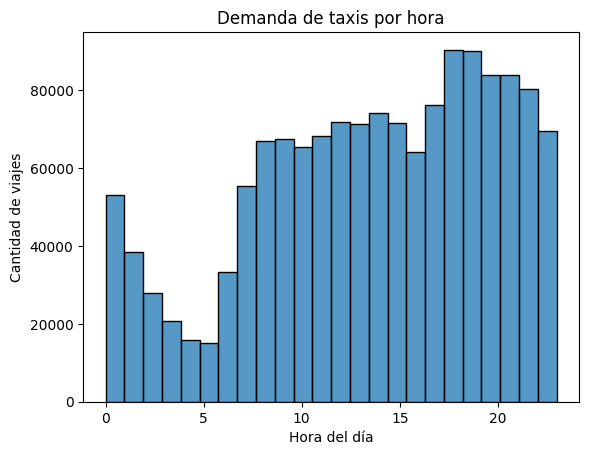

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

df = pd.read_csv('../data/nyc_taxi_clean.csv')

# Mapa de calor de pickups
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
heat_data = [[row['pickup_latitude'], row['pickup_longitude']] for index, row in df.head(500).iterrows()]
from folium.plugins import HeatMap
HeatMap(heat_data).add_to(m)
m.save('../reportes/heatmap.html')

# Distribución de horas
sns.histplot(df['hour'], bins=24)
plt.title("Demanda de taxis por hora")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de viajes")
plt.show()
